In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



# 세가지
# 케라스는 텐서객체를 반드시 줄 필요 없음. 시리즈 등등 가능
# 내부적으로 tensor로 바꾸는 기능이 있음
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [12]:
df = pd.read_csv('deeplearning_class-master/dataset/pima-indians-diabetes.csv', header = None)
df.columns = ['Number', 'Plasma','Diastolic','Triceps','insulin','mass','pedigree','Age','Class']
df

# 1. Number of times pregnant
# 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# 3. Diastolic blood pressure (mm Hg)
# 4. Triceps skin fold thickness (mm)
# 5. 2-Hour serum insulin (mu U/ml)
# 6. Body mass index (weight in kg/(height in m)^2)
# 7. Diabetes pedigree function
# 8. Age (years)
# 9. Class variable (0 or 1)

,Number,Plasma,Diastolic,Triceps,insulin,mass,pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [35]:
# Dense 개체 생성
# units 는 출력 개수, 혹은 라벨의 개수
# input_dim은 feature의 개수

IO = Dense(units=1, input_dim=1)

# 리스트로 주어야 함
# sequential 순차적 구조로 Dense를 쌓아 올림 => 여러개 쌓아올릴 경우 딥러닝
model = Sequential( [IO] )

# loss는 cost랑 동일
# Adam의 러닝메이트 = 0.1 -> 러닝메이트 스스로 조절 가능
# optimizer의 종류는 매우 다양함
model.compile( loss = 'binary_crossentropy', optimizer = Adam(0.1), metrics = ['accuracy'] )


#epochs = 학습 횟수
h = model.fit(df['insulin'], df['Class'], epochs = 200, batch_size=10)

Epoch 1/200
77/77 [==============================] - 0s 894us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 2/200
77/77 [==============================] - 0s 808us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 3/200
77/77 [==============================] - 0s 660us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 4/200
77/77 [==============================] - 0s 701us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 5/200
77/77 [==============================] - 0s 688us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 6/200
77/77 [==============================] - 0s 684us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 7/200
77/77 [==============================] - 0s 818us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 8/200
77/77 [==============================] - 0s 603us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 9/200
77/77 [==============================] - 0s 812us/step - loss: 5.3827 - accuracy: 0.6510
Epoch 10/200
77/77 [==============================] - 0s 734us/step - loss: 5.3827 - accura

In [36]:
wb = IO.get_weights()
wb

[array([[-1.4696815]], dtype=float32), array([0.], dtype=float32)]

In [37]:
# 최종 w값
float(wb[0])

-1.4696815013885498

In [38]:
# 최종 b값
float(wb[1])

0.0

In [39]:
# loss키를 줄 경우 cost값 확인 가능
h.history['loss']

[5.382664203643799,
 5.382663249969482,
 5.382663726806641,
 5.382663249969482,
 5.382663249969482,
 5.382664203643799,
 5.382663726806641,
 5.382663726806641,
 5.382664203643799,
 5.382665157318115,
 5.382664203643799,
 5.382664203643799,
 5.382665157318115,
 5.382663249969482,
 5.382663249969482,
 5.382663726806641,
 5.382665157318115,
 5.382664203643799,
 5.382663249969482,
 5.382664203643799,
 5.382664203643799,
 5.382665157318115,
 5.382663726806641,
 5.382663249969482,
 5.382663249969482,
 5.382664203643799,
 5.382663726806641,
 5.382665634155273,
 5.382665157318115,
 5.382664203643799,
 5.382663726806641,
 5.382663249969482,
 5.382664203643799,
 5.382663249969482,
 5.382663249969482,
 5.382663249969482,
 5.382663249969482,
 5.382663726806641,
 5.382663249969482,
 5.382664203643799,
 5.382664203643799,
 5.382663726806641,
 5.382664203643799,
 5.382664203643799,
 5.382663726806641,
 5.382665634155273,
 5.382663726806641,
 5.382663726806641,
 5.382665634155273,
 5.382664203643799,


<function matplotlib.pyplot.show(*args, **kw)>

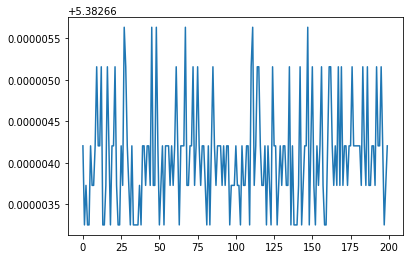

In [40]:
plt.plot(h.history['loss'])
plt.show

In [41]:
# 예측값 추정
model.predict( [94] )

array([[-138.15005]], dtype=float32)

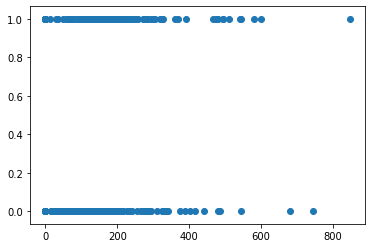

In [42]:
plt.scatter(df['insulin'], df['Class'])

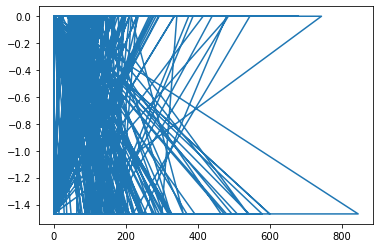

In [43]:
# 예측하는 방법 까먹지 않을 것
plt.plot(df['insulin'], model.predict(df['Class']))
plt.show()

In [45]:
h.history['accuracy'][-1]

0.6510416865348816